In [160]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

X, y = load_iris(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)


In [161]:
# LogisticRegression Model Implementation
#logreg = LogisticRegression()
#logreg.fit(X_train, y_train)
#Y_pred = logreg.predict(X_test)

# Naive Bayes Model Implementation
from sklearn.naive_bayes import GaussianNB
logreg = GaussianNB()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)

In [162]:
# Model Evaluation
ac_sc = accuracy_score(y_test, Y_pred)
rc_sc = recall_score(y_test, Y_pred, average="weighted")
pr_sc = precision_score(y_test, Y_pred, average="weighted")
f1_sc = f1_score(y_test, Y_pred, average='micro')
confusion_m = confusion_matrix(y_test, Y_pred)

print("========== Naive Bayes Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

========== Naive Bayes Results ==========
Accuracy    :  0.9666666666666667
Recall      :  0.9666666666666667
Precision   :  0.9708333333333333
F1 Score    :  0.9666666666666667
Confusion Matrix: 
[[11  0  0]
 [ 0 11  1]
 [ 0  0  7]]


In [163]:
# Your task: Draw confusion matrix graph and AUC graph.

Text(0.5, 427.9555555555555, 'Predicted label')

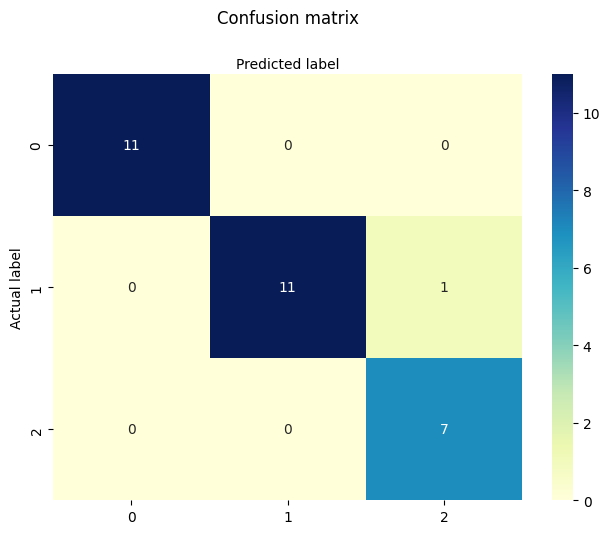

In [164]:
# Visualizing Confusion Matrix using Heatmap
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
cnf_matrix = confusion_matrix(y_test, Y_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

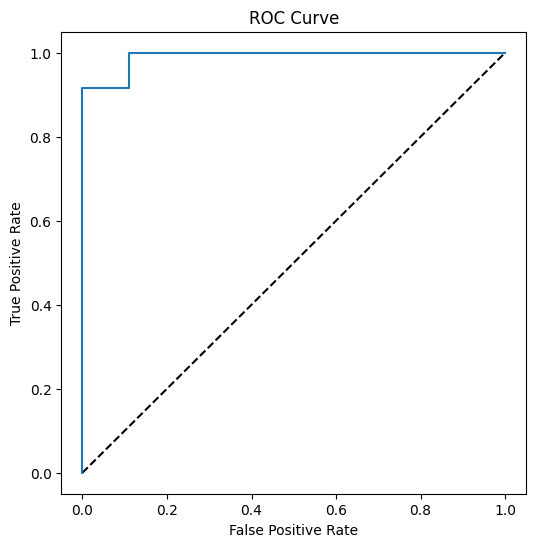

In [165]:
# Visualizing 'ROC' curve
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

%matplotlib inline

y_scores = logreg.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1], pos_label=1)

fig = plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()